In [19]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio import Scattering2D
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage  as ndimage
from sklearn.cluster import KMeans

In [20]:
# Load the NIfTI file
month1 = nib.load('Khalil_1_11052019.nii')
month1_data = month1.get_fdata()
month1_data = month1_data/np.max(month1_data)

month3 = nib.load('Khalil_3_24082019.nii')
month3_data = month3.get_fdata()
month3_data = month3_data/np.max(month3_data)

pad = 20
pad_data =np.zeros((month1_data.shape[0],month1_data.shape[1],pad))
month3_data_trimming = month3_data[0:month1_data.shape[0],0:month1_data.shape[1],pad:month1_data.shape[2]]
month3_data = np.concatenate((month3_data_trimming, pad_data), axis=2)

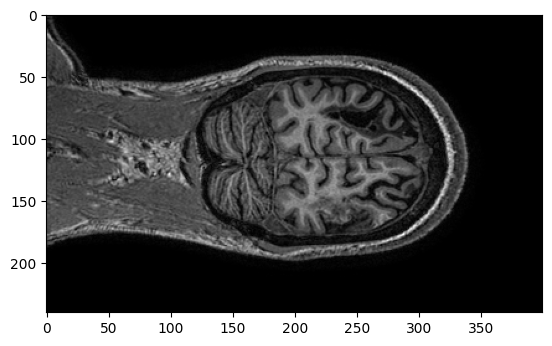

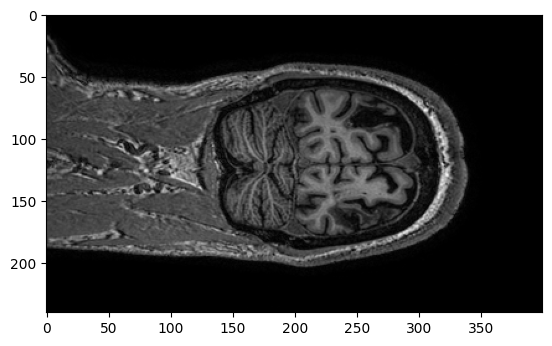

In [21]:
plt.imshow(month1_data[:,100,:])
plt.show()
plt.imshow(month3_data[:,100,:])
plt.show()

## Segmenting month 1 data

In [22]:

# Assuming `mri_volume` is the 3D numpy array representing the brain MRI volume
# Step 1: Flatten the 3D volume into a 1D array
mri_volume = month1_data
flattened_volume = mri_volume.flatten().reshape(-1, 1)

# Step 2: Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(flattened_volume)

# Step 3: Get the labels and reshape them back to the original 3D shape
labels = kmeans.labels_.reshape(mri_volume.shape)

# Step 4: Sort clusters by mean intensity to identify bone cluster
# Calculate the mean intensity of each cluster
cluster_means = [np.mean(mri_volume[labels == i]) for i in range(3)]
# Sort clusters by mean intensity
sorted_clusters = np.argsort(cluster_means)

# Assume the highest mean intensity cluster is bone, and the lowest is background
background_cluster = sorted_clusters[0]
bone_cluster = sorted_clusters[2]  # Assuming the highest intensity corresponds to bone

# Step 5: Create binary masks
bone_mask = (labels == bone_cluster).astype(np.uint8)
other_tissues_mask = ((labels == sorted_clusters[1]) | (labels == bone_cluster)).astype(np.uint8)

# `bone_mask` is now a binary mask for bones, and `other_tissues_mask` includes all valued areas

c:\Users\abhiv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


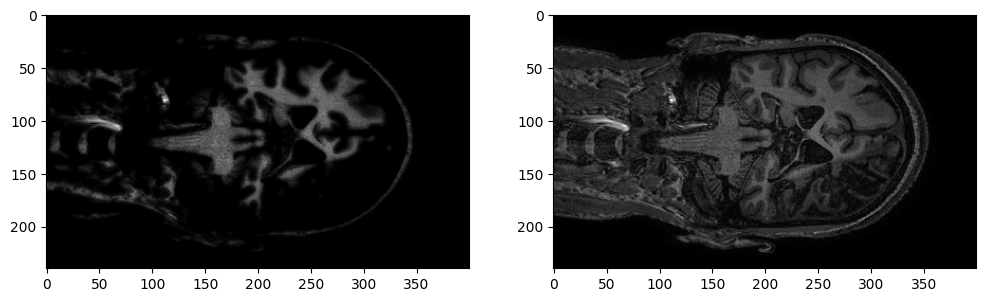

In [23]:
idx = 160
fig, ax = plt.subplots(1,2, figsize=(12,4))

# sliced_bone_mask = bone_mask[:,:,idx]
# sliced_mri_volume = mri_volume[:,:,idx]
smooth_bone_mask = ndimage.gaussian_filter(bone_mask*10, sigma=2)
sliced_mri = mri_volume[:,idx,:]
sliced_mask = smooth_bone_mask[:,idx,:]
# ax[0].imshow(bone_mask[:,:,idx], cmap='gray')
plt.set_cmap('gray')
ax[0].imshow(np.where(sliced_mask!=0, sliced_mri*sliced_mask, 0))
# ax[1].imshow(other_tissues_mask[:,:,idx], cmap='gray')
ax[1].imshow(mri_volume[:,idx,:])

### Generated Data for Month 1

In [24]:
bone_mask_month_1 = bone_mask
smooth_bone_mask_month_1 = smooth_bone_mask
masked_bone_month_1 = smooth_bone_mask_month_1 * month1_data

## Segmenting month 3 data

In [ ]:

# Assuming `mri_volume` is the 3D numpy array representing the brain MRI volume
# Step 1: Flatten the 3D volume into a 1D array
mri_volume = month3_data
flattened_volume = mri_volume.flatten().reshape(-1, 1)

# Step 2: Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(flattened_volume)

# Step 3: Get the labels and reshape them back to the original 3D shape
labels = kmeans.labels_.reshape(mri_volume.shape)

# Step 4: Sort clusters by mean intensity to identify bone cluster
# Calculate the mean intensity of each cluster
cluster_means = [np.mean(mri_volume[labels == i]) for i in range(3)]
# Sort clusters by mean intensity
sorted_clusters = np.argsort(cluster_means)

# Assume the highest mean intensity cluster is bone, and the lowest is background
background_cluster = sorted_clusters[0]
bone_cluster = sorted_clusters[2]  # Assuming the highest intensity corresponds to bone

# Step 5: Create binary masks
bone_mask = (labels == bone_cluster).astype(np.uint8)
other_tissues_mask = ((labels == sorted_clusters[1]) | (labels == bone_cluster)).astype(np.uint8)

# `bone_mask` is now a binary mask for bones, and `other_tissues_mask` includes all valued areas

c:\Users\abhiv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


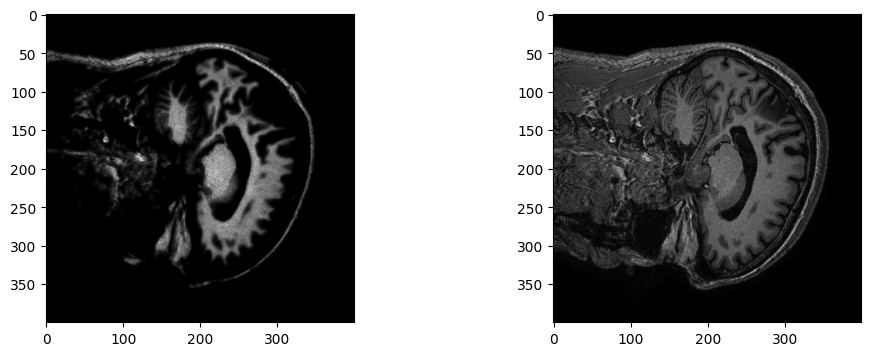

In [26]:
idx = 100
fig, ax = plt.subplots(1,2, figsize=(12,4))

# sliced_bone_mask = bone_mask[:,:,idx]
# sliced_mri_volume = mri_volume[:,:,idx]
smooth_bone_mask = ndimage.gaussian_filter(bone_mask*10, sigma=2)
sliced_mri = mri_volume[idx,:,:]
sliced_mask = smooth_bone_mask[idx,:,:]
# ax[0].imshow(bone_mask[:,:,idx], cmap='gray')
plt.set_cmap('gray')
ax[0].imshow(np.where(sliced_mask!=0, sliced_mri*sliced_mask, 0))
# ax[1].imshow(other_tissues_mask[:,:,idx], cmap='gray')
ax[1].imshow(mri_volume[idx,:,:])

### Generated Data for Month 3

In [27]:
bone_mask_month_3 = bone_mask
smooth_bone_mask_month_3 = smooth_bone_mask
masked_bone_month_3 = smooth_bone_mask_month_3 * month3_data

## Separator Planes

In [28]:
masked_bone_month_1.shape

(240, 400, 400)

In [29]:
m1x, m1y, m1z = mri_volume.shape
m1constraints = {}
for i in range(m1x):
    if np.count_nonzero(smooth_bone_mask_month_1[i,:,:]):
        m1constraints['x']=[i]
        break
for i in range(m1x-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_1[i,:,:]):
        m1constraints['x'].append(i)
        break
for i in range(m1y):
    if np.count_nonzero(smooth_bone_mask_month_1[:,i,:]):
        m1constraints['y']=[i]
        break
for i in range(m1y-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_1[:,i,:]):
        m1constraints['y'].append(i)
        break
for i in range(m1z):
    if np.count_nonzero(smooth_bone_mask_month_1[:,:,i]):
        m1constraints['z']=[i]
        break
for i in range(m1z-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_1[:,:,i]):
        m1constraints['z'].append(i)
        break

In [30]:
m3x, m3y, m3z = mri_volume.shape
m3constraints = {}
for i in range(m3x):
    if np.count_nonzero(smooth_bone_mask_month_3[i,:,:]):
        m3constraints['x']=[i]
        break
for i in range(m3x-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_3[i,:,:]):
        m3constraints['x'].append(i)
        break
for i in range(m3y):
    if np.count_nonzero(smooth_bone_mask_month_3[:,i,:]):
        m3constraints['y']=[i]
        break
for i in range(m3y-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_3[:,i,:]):
        m3constraints['y'].append(i)
        break
for i in range(m3z):
    if np.count_nonzero(smooth_bone_mask_month_3[:,:,i]):
        m3constraints['z']=[i]
        break
for i in range(m3z-1,0,-1):
    if np.count_nonzero(smooth_bone_mask_month_3[:,:,i]):
        m3constraints['z'].append(i)
        break

In [ ]:
print(m1constraints)
print(m3constraints)

{'x': [1, 225], 'y': [25, 385], 'z': [0, 352]}
{'x': [15, 225], 'y': [27, 372], 'z': [0, 361]}


In [ ]:
diff_months = np.abs(smooth_bone_mask_month_1 - smooth_bone_mask_month_3)

In [34]:
nifti_img = nib.Nifti1Image(bone_mask_month_1, np.eye(4))
nib.save(nifti_img, './saved-data/khalil/bone_mask_month_1.nii')
nifti_img = nib.Nifti1Image(bone_mask_month_3, np.eye(4))   
nib.save(nifti_img, './saved-data/khalil/bone_mask_month_3.nii')